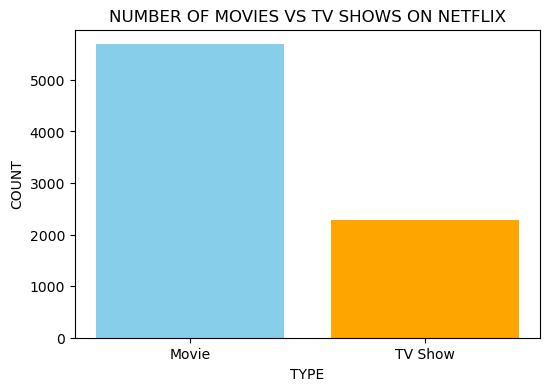

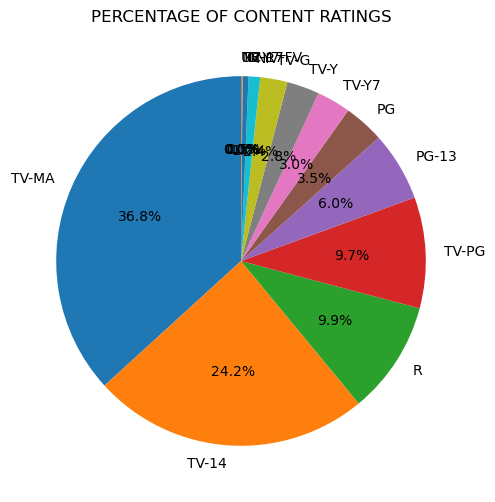

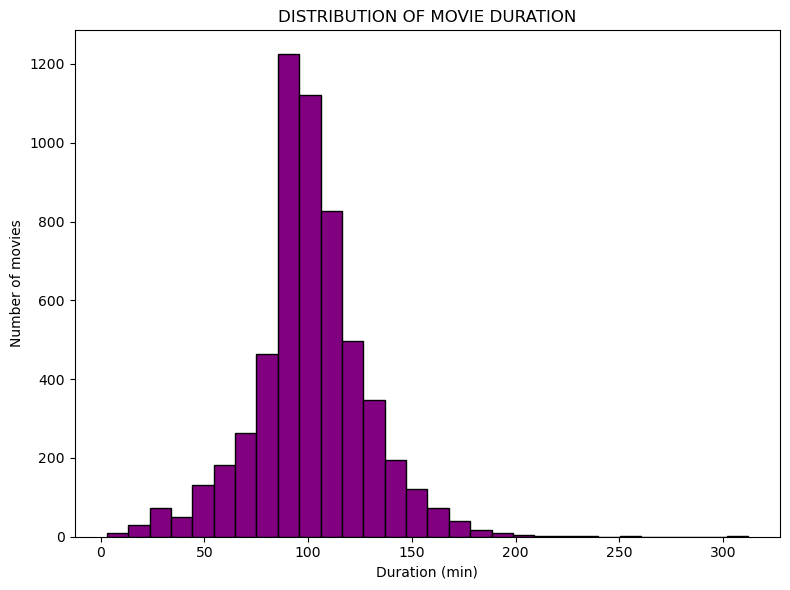

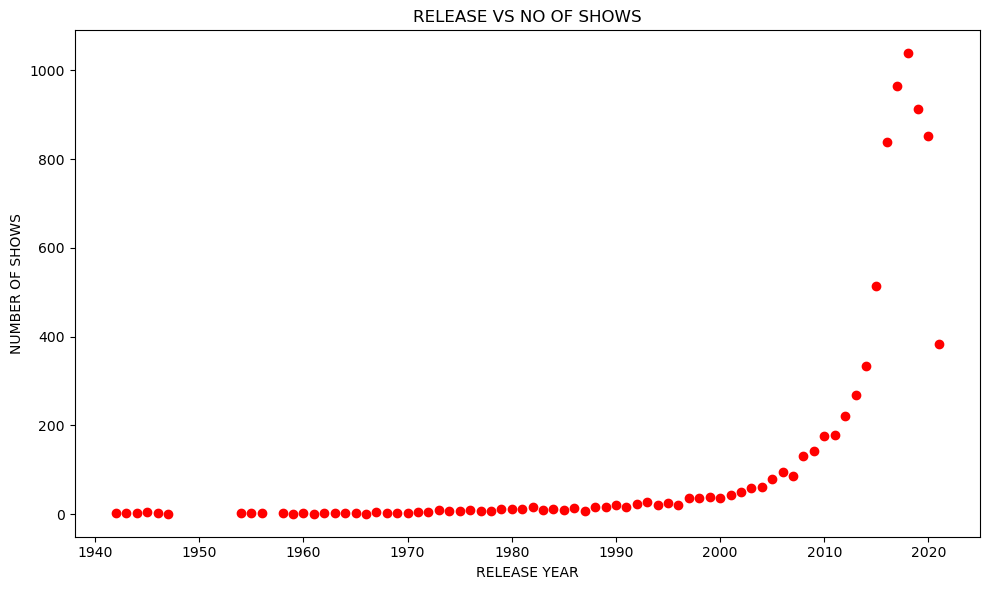

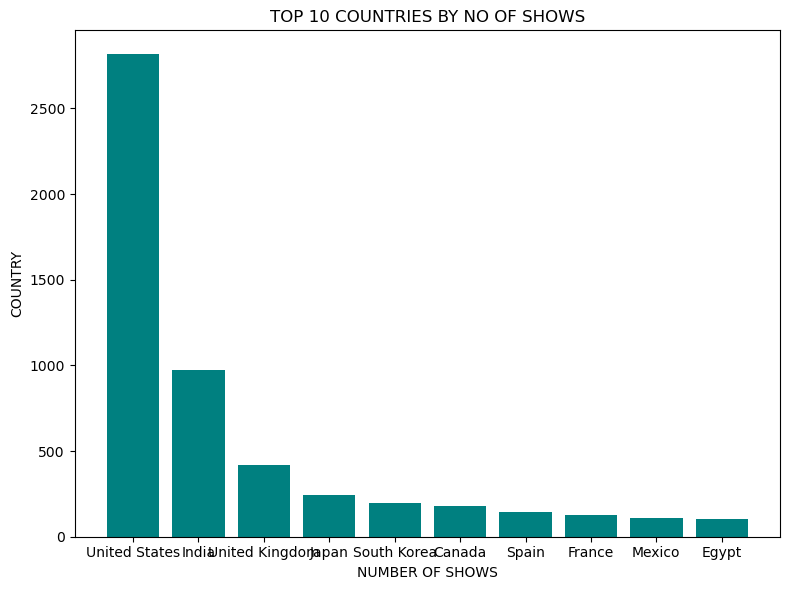

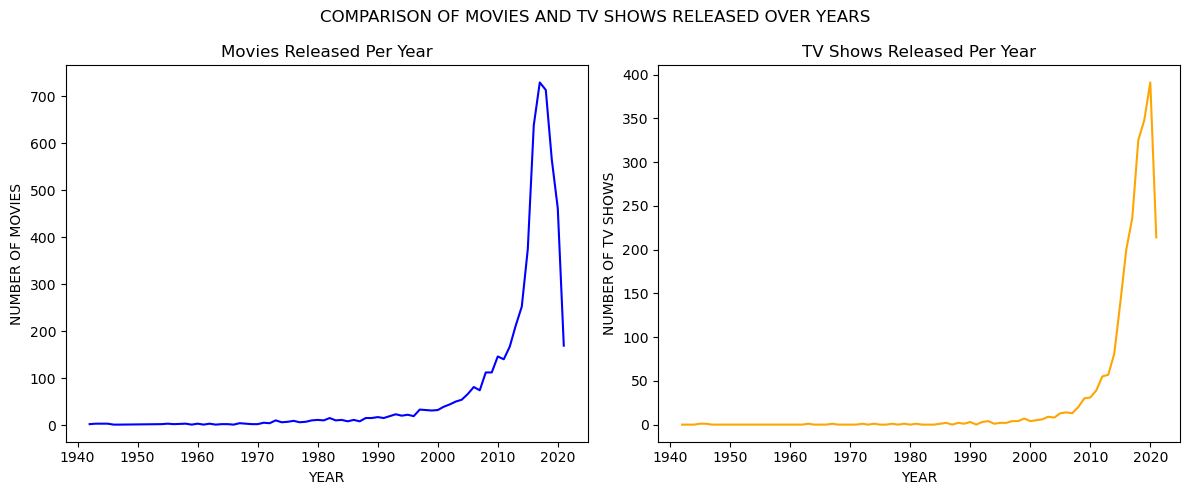

In [ ]:
#import the libraries
import pandas as pd 
import matplotlib.pyplot as plt 


#Load the data
df = pd.read_csv("C:/Users/Asus/OneDrive - PESUNIVERSITY/Documents/Python Course/Libraries/netflix_titles.csv")

#Clean data
df = df.dropna(subset=["type" , "release_year" , "rating" , "country" , "duration"])

#BAR CHART
type_counts = df["type"].value_counts()
plt.figure(figsize = (6,4))
plt.bar(type_counts.index , type_counts.values , color =["skyblue", "orange"])
plt.title("NUMBER OF MOVIES VS TV SHOWS ON NETFLIX")
plt.xlabel("TYPE") 
plt.ylabel("COUNT")
plt.savefig("movies_vs_tvshows.png")
plt.show()

#PIE CHART
rating_counts = df["rating"].value_counts()
plt.figure(figsize = (8,6))
plt.pie(rating_counts , labels = rating_counts.index ,autopct = "%1.1f%%" , startangle =90)
plt.title("PERCENTAGE OF CONTENT RATINGS")
plt.savefig("content_ratings.png")
plt.show()

movie_df = df[df["type"] == "Movie"].copy()
movie_df["duration_int"] = movie_df ["duration"].str.replace(" min","").astype(int)

plt.figure(figsize = (8,6))
plt.hist(movie_df["duration_int"],bins=30, color = "purple" , edgecolor ="black") 
plt.title("DISTRIBUTION OF MOVIE DURATION") 
plt.xlabel("Duration (min)") 
plt.ylabel("Number of movies")
plt.tight_layout()
plt.savefig("movie_duration(hist).png") 
plt.show()

#SCATTER PLOT
release_counts = df ["release_year"].value_counts().sort_index()
plt.figure(figsize = (10,6))
plt.scatter(release_counts.index , release_counts.values , color = "red") 
plt.title("RELEASE VS NO OF SHOWS") 
plt.xlabel("RELEASE YEAR") 
plt.ylabel("NUMBER OF SHOWS")
plt.tight_layout()
plt.savefig("relsease_year(scatter).png") 
plt.show()

#HORIZONTAL BAR
country_counts =df["country"].value_counts().head(10)
plt.figure(figsize = (8,6))
plt.bar(country_counts.index ,country_counts.values , color = "teal")
plt.title("TOP 10 COUNTRIES BY NO OF SHOWS") 
plt.xlabel("NUMBER OF SHOWS") 
plt.ylabel("COUNTRY")
plt.tight_layout()
plt.savefig("top10_countries.png") 
plt.show()

content_by_year = df.groupby(["release_year", "type"]).size().unstack().fillna(0)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Fixed here

# FIRST SUBPLOT: MOVIES
ax[0].plot(content_by_year.index, content_by_year["Movie"], color="blue")
ax[0].set_title("Movies Released Per Year")
ax[0].set_xlabel("YEAR")
ax[0].set_ylabel("NUMBER OF MOVIES")  # Fixed here

# SECOND SUBPLOT: TV SHOWS
ax[1].plot(content_by_year.index, content_by_year["TV Show"], color="orange")
ax[1].set_title("TV Shows Released Per Year")
ax[1].set_xlabel("YEAR")
ax[1].set_ylabel("NUMBER OF TV SHOWS")  # Also fixed here

fig.suptitle("COMPARISON OF MOVIES AND TV SHOWS RELEASED OVER YEARS")  # Typo fixed in title
plt.tight_layout()
plt.savefig("Movies_TV_Shows_comparison.png")  # File name corrected for clarity
plt.show()

